# 상권 데이터 처리 및 분석

---




## 한글 폰트 설정

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import platform
import numpy as np
import seaborn as sns
import re

matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='NanumBarunGothic')

* 런타임 다시 시작

In [3]:
import pandas as pd


## 데이터 다운로드

https://drive.google.com/file/d/1Y6KnJoy4mdgKOIvf8JXgvvEEujk9WYAG/view?usp=drive_link



## 상권 데이터

In [5]:
df_sales_2020 = pd.read_csv('2020.csv', encoding='euc-kr')

In [6]:
df_sales_2020.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,3,R,전통시장,1001370,역촌중앙시장,CS300009,청과상,33850673.0,300,...,0,100,200,0,0,0,0,100,200,2
1,2020,3,R,전통시장,1001386,신수시장,CS200001,일반교습학원,35211411.0,110,...,0,0,110,0,0,92,18,0,0,1
2,2020,1,A,골목상권,1000022,창신2길,CS200001,일반교습학원,22367209.0,82,...,0,54,28,0,0,0,82,0,0,2
3,2020,3,R,전통시장,1001402,신월6동골목시장,CS100009,호프-간이주점,985883.0,6,...,0,6,0,0,0,6,0,0,0,3
4,2020,1,A,골목상권,1000001,계동길,CS100001,한식음식점,431442455.0,18548,...,345,8752,7776,611,3828,4356,3428,2614,1690,19


In [7]:
df_sales_2020.describe()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
count,132321.0,132321.000000,1.323210e+05,1.323210e+05,1.323210e+05,132321.000000,132321.000000,132321.000000,132321.000000,132321.000000,...,132321.000000,1.323210e+05,1.323210e+05,132321.000000,1.323210e+05,132321.000000,132321.000000,1.323210e+05,1.323210e+05,132321.000000
mean,2020.0,2.493761,1.000777e+06,5.626982e+08,2.197486e+04,77.537481,22.549671,15.497147,15.409285,15.414182,...,2105.183546,1.143606e+04,9.680797e+03,359.968886,5.637969e+03,4960.642861,4124.629447,3.511693e+03,2.521935e+03,8.256392
std,0.0,1.116996,4.209264e+02,4.685697e+09,8.728051e+04,14.770251,14.780984,10.847583,10.393551,10.219365,...,9142.743229,4.606766e+04,4.030669e+04,2120.428096,2.716112e+04,21651.728574,16183.240702,1.381592e+04,1.502776e+04,68.151205
min,2020.0,1.000000,1.000001e+06,5.300000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2020.0,1.000000,1.000415e+06,2.329176e+07,4.390000e+02,69.000000,12.000000,11.000000,11.000000,12.000000,...,0.000000,2.050000e+02,1.590000e+02,0.000000,2.800000e+01,58.000000,86.000000,7.900000e+01,3.700000e+01,2.000000
50%,2020.0,2.000000,1.000816e+06,8.923507e+07,2.395000e+03,77.000000,23.000000,14.000000,15.000000,15.000000,...,37.000000,1.197000e+03,9.850000e+02,5.000000,2.800000e+02,410.000000,488.000000,4.630000e+02,2.540000e+02,3.000000
75%,2020.0,3.000000,1.001132e+06,3.312710e+08,1.292600e+04,88.000000,31.000000,19.000000,18.000000,18.000000,...,652.000000,6.342000e+03,5.561000e+03,98.000000,2.180000e+03,2451.000000,2464.000000,2.262000e+03,1.372000e+03,7.000000
max,2020.0,4.000000,1.001496e+06,4.806090e+11,5.190446e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,389631.000000,2.900634e+06,1.954748e+06,140639.000000,1.184669e+06,917797.000000,978016.000000,1.147842e+06,1.385663e+06,11203.000000


In [8]:
df_sales_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132321 entries, 0 to 132320
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년_코드          132321 non-null  int64  
 1   기준_분기_코드         132321 non-null  int64  
 2   상권_구분_코드         132321 non-null  object 
 3   상권_구분_코드_명       132321 non-null  object 
 4   상권_코드            132321 non-null  int64  
 5   상권_코드_명          132321 non-null  object 
 6   서비스_업종_코드        132321 non-null  object 
 7   서비스_업종_코드_명      132321 non-null  object 
 8   분기당_매출_금액        132321 non-null  float64
 9   분기당_매출_건수        132321 non-null  int64  
 10  주중_매출_비율         132321 non-null  int64  
 11  주말_매출_비율         132321 non-null  int64  
 12  월요일_매출_비율        132321 non-null  int64  
 13  화요일_매출_비율        132321 non-null  int64  
 14  수요일_매출_비율        132321 non-null  int64  
 15  목요일_매출_비율        132321 non-null  int64  
 16  금요일_매출_비율        132321 non-null  int6

## 데이터 정제

In [9]:
df_sales = df_sales_2020.iloc[:,[3, 7, 8, 33, 34, 35, 36, 37, 38, 39, 40,
                                 41, 48, 49, 50, 51, 52, 53, 54, 55, 79]]
df_sales

,상권_구분_코드_명,서비스_업종_코드_명,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,...,일요일_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
0,전통시장,청과상,33850673.0,1497817.0,32352856.0,0,0.0,1497817,0,0,...,0,1397963.0,32452710.0,0,0,0,0.0,30954893,2895780,2
1,전통시장,일반교습학원,35211411.0,24574631.0,10636780.0,0,0.0,24207845,0,366786,...,10636780,0.0,35211411.0,0,0,28792664,6418747.0,0,0,1
2,골목상권,일반교습학원,22367209.0,22367209.0,0.0,0,13450049.0,8917160,0,0,...,0,12909615.0,9457594.0,0,0,0,22367209.0,0,0,2
3,전통시장,호프-간이주점,985883.0,985883.0,0.0,0,0.0,985883,0,0,...,0,985883.0,0.0,0,0,985883,0.0,0,0,3
4,골목상권,한식음식점,431442455.0,347666954.0,83775501.0,57836408,62676591.0,76100528,74583641,76469786,...,39305683,191019483.0,152066866.0,2544277,69650930,91286746,72418118.0,65658966,41527310,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132316,전통시장,분식전문점,28919831.0,25846694.0,3073137.0,1876230,3299578.0,2426160,9445850,8798876,...,0,13133615.0,9834036.0,0,0,4658228,3461322.0,7957805,6890296,8
132317,전통시장,미용실,59125109.0,59125109.0,0.0,0,0.0,59125109,0,0,...,0,59125109.0,0.0,0,0,0,0.0,0,59125109,1
132318,전통시장,피부관리실,6928058.0,6928058.0,0.0,0,2589928.0,2719425,0,1618705,...,0,0.0,6928058.0,0,0,2719425,2589928.0,0,1618705,1
132319,관광특구,피부관리실,17953355.0,17115659.0,837696.0,12375060,2313184.0,0,2427415,0,...,837696,13307948.0,837696.0,0,0,837696,9090908.0,3265112,951928,3


## 데이터 분석 및 시각화

### 상권 구분별 분석 및 시각화

In [10]:
df_sales.groupby('상권_구분_코드_명')['점포수'].count()

상권_구분_코드_명
골목상권    84892
관광특구     1123
발달상권    29533
전통시장    16773
Name: 점포수, dtype: int64

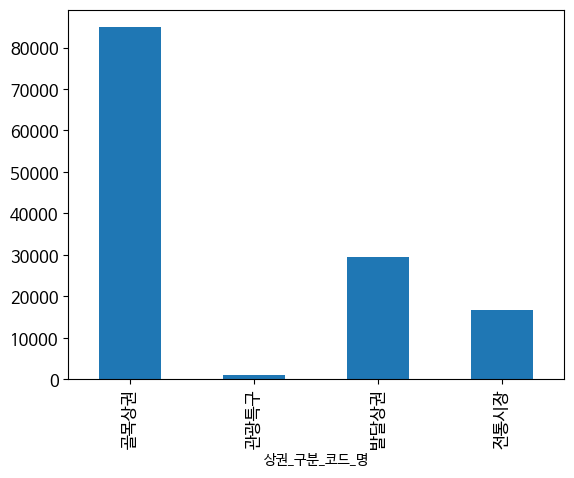

In [11]:
df_sales.groupby('상권_구분_코드_명')['점포수'].count().plot.bar(fontsize=12);

In [12]:
df_sales.groupby('상권_구분_코드_명').sum()

<ipython-input-12-3cc8125aeecb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby('상권_구분_코드_명').sum()


,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
상권_구분_코드_명,,,,,,,,,,,,,,,,,,,
골목상권,2.174813e+13,1.671354e+13,5.034597e+12,3251008769603,3.345633e+12,3308339393318,3321166735215,3487390460287,3099636853580,1934959948808,1.088801e+13,9.083145e+12,126078787955,2806496573558,3862411970108,5.029693e+12,4646930553567,3499509348983,407291
관광특구,4.817223e+12,3.622450e+12,1.194773e+12,670091699586,7.144682e+11,719807795118,745003027949,773079634653,727171144799,467602120283,2.025868e+12,2.271804e+12,25015788835,826058279905,1038739736227,9.280307e+11,778671943254,701154902953,121945
발달상권,3.771022e+13,2.951848e+13,8.191737e+12,5783626741634,5.815919e+12,5812226146122,5888129281176,6218583185215,5190692006711,3001045276212,1.698316e+13,1.489990e+13,233983993385,6249682443102,7187976114236,7.622133e+12,6357093195114,4232194648761,432879
전통시장,1.018121e+13,7.558260e+12,2.622945e+12,1417964075699,1.528802e+12,1478390107294,1532914127309,1600190332843,1699481786901,923463170679,4.459969e+12,5.143541e+12,30994101503,860284558218,1461466364528,1.871984e+12,2461050592547,2917748120297,130379


<ipython-input-13-8d08202cf34c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby('상권_구분_코드_명').sum().plot.bar(figsize=(20, 8), fontsize=12);


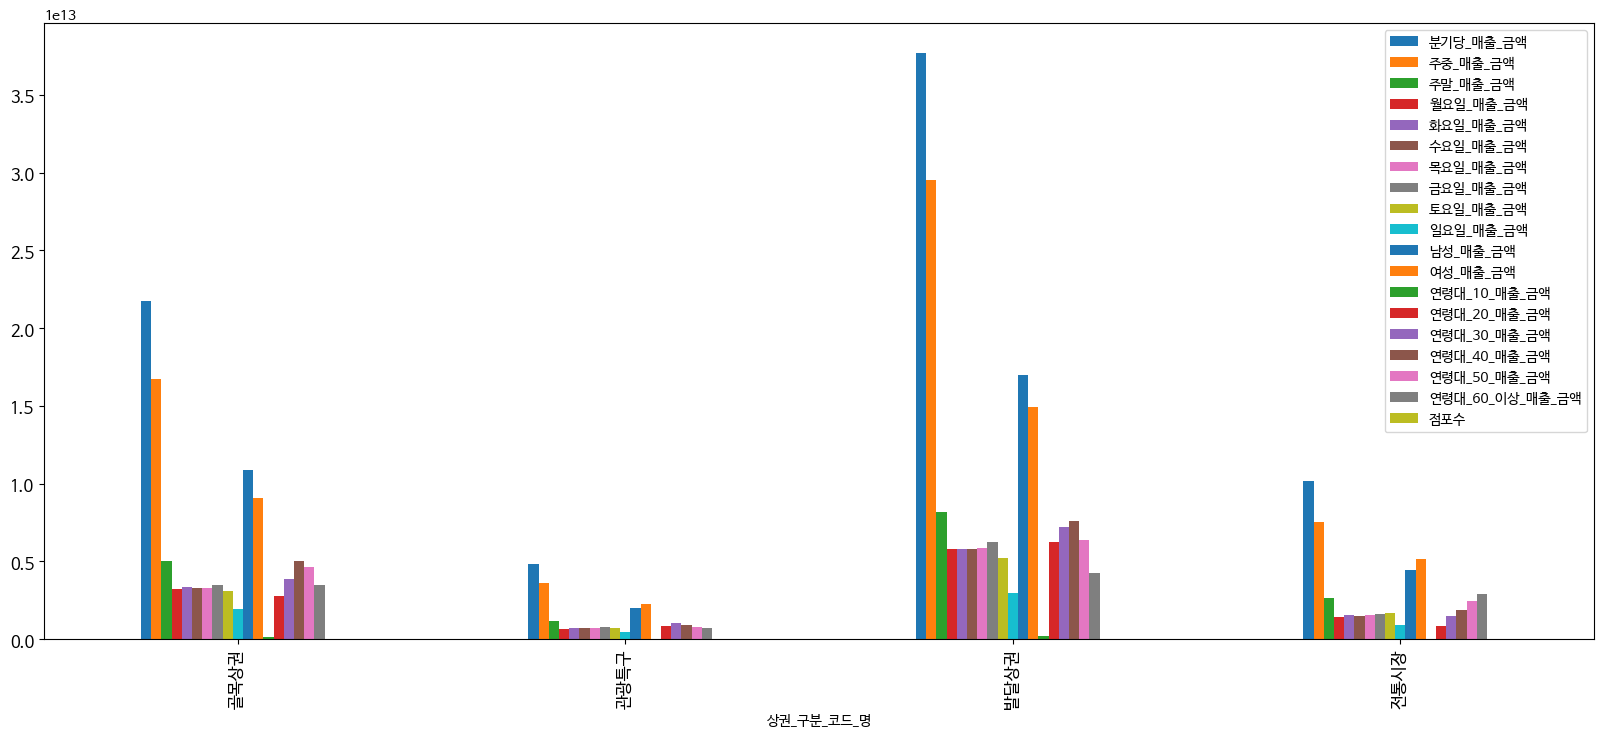

In [13]:
df_sales.groupby('상권_구분_코드_명').sum().plot.bar(figsize=(20, 8), fontsize=12);

In [14]:
df_sales.groupby('상권_구분_코드_명')['분기당_매출_금액'].sum()

상권_구분_코드_명
골목상권    2.174813e+13
관광특구    4.817223e+12
발달상권    3.771022e+13
전통시장    1.018121e+13
Name: 분기당_매출_금액, dtype: float64

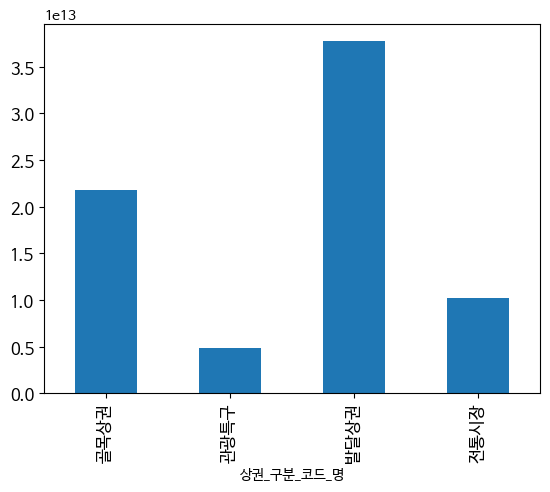

In [15]:
df_sales.groupby('상권_구분_코드_명')['분기당_매출_금액'].sum().plot.bar(fontsize=12);

In [16]:
df_sales.groupby('상권_구분_코드_명')[['주중_매출_금액', '주말_매출_금액']].sum()

,주중_매출_금액,주말_매출_금액
상권_구분_코드_명,,
골목상권,1.671354e+13,5.034597e+12
관광특구,3.622450e+12,1.194773e+12
발달상권,2.951848e+13,8.191737e+12
전통시장,7.558260e+12,2.622945e+12


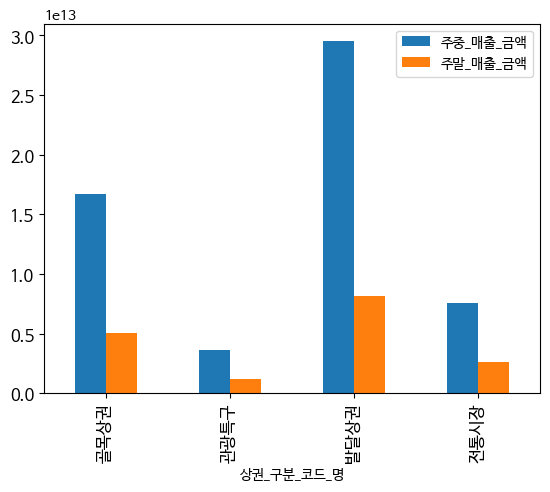

In [17]:
df_sales.groupby('상권_구분_코드_명')[['주중_매출_금액', '주말_매출_금액']].sum().plot.bar(fontsize=12);

In [18]:
df_sales.groupby('상권_구분_코드_명')[['연령대_10_매출_금액', '연령대_20_매출_금액',
                                       '연령대_30_매출_금액', '연령대_40_매출_금액',
'연령대_50_매출_금액', '연령대_60_이상_매출_금액']].sum()


,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
상권_구분_코드_명,,,,,,
골목상권,126078787955,2806496573558,3862411970108,5.029693e+12,4646930553567,3499509348983
관광특구,25015788835,826058279905,1038739736227,9.280307e+11,778671943254,701154902953
발달상권,233983993385,6249682443102,7187976114236,7.622133e+12,6357093195114,4232194648761
전통시장,30994101503,860284558218,1461466364528,1.871984e+12,2461050592547,2917748120297


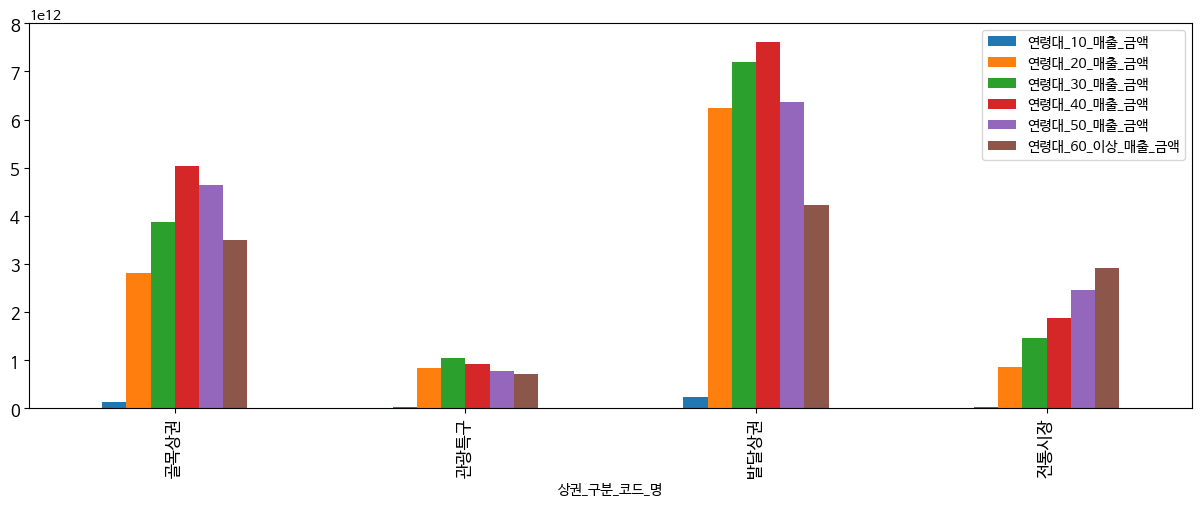

In [19]:
df_sales.groupby('상권_구분_코드_명')[['연령대_10_매출_금액', '연령대_20_매출_금액',
                                       '연령대_30_매출_금액', '연령대_40_매출_금액',
'연령대_50_매출_금액', '연령대_60_이상_매출_금액']].sum() \
                                       .plot.bar(figsize=(15, 5), fontsize=12);

In [20]:
df_sales.groupby('상권_구분_코드_명')[['남성_매출_금액', '여성_매출_금액']].sum()

,남성_매출_금액,여성_매출_금액
상권_구분_코드_명,,
골목상권,1.088801e+13,9.083145e+12
관광특구,2.025868e+12,2.271804e+12
발달상권,1.698316e+13,1.489990e+13
전통시장,4.459969e+12,5.143541e+12


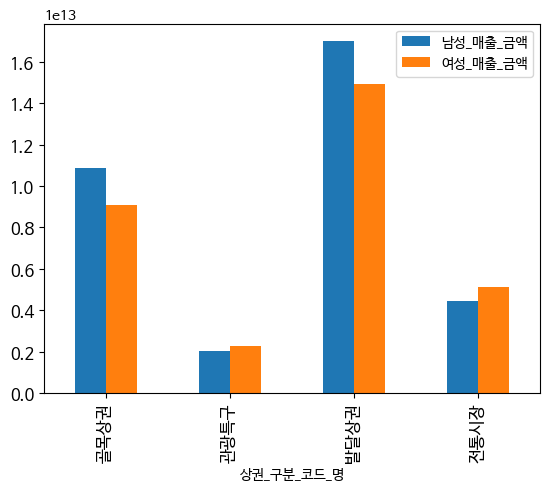

In [21]:
df_sales.groupby('상권_구분_코드_명')[['남성_매출_금액',
                                       '여성_매출_금액']].sum()\
                                       .plot.bar(fontsize=12);

In [22]:
df_sales.groupby('상권_구분_코드_명')[['월요일_매출_금액', '화요일_매출_금액',
                                       '수요일_매출_금액', '목요일_매출_금액',
'금요일_매출_금액', '토요일_매출_금액',
'일요일_매출_금액']].sum()


,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액
상권_구분_코드_명,,,,,,,
골목상권,3251008769603,3.345633e+12,3308339393318,3321166735215,3487390460287,3099636853580,1934959948808
관광특구,670091699586,7.144682e+11,719807795118,745003027949,773079634653,727171144799,467602120283
발달상권,5783626741634,5.815919e+12,5812226146122,5888129281176,6218583185215,5190692006711,3001045276212
전통시장,1417964075699,1.528802e+12,1478390107294,1532914127309,1600190332843,1699481786901,923463170679


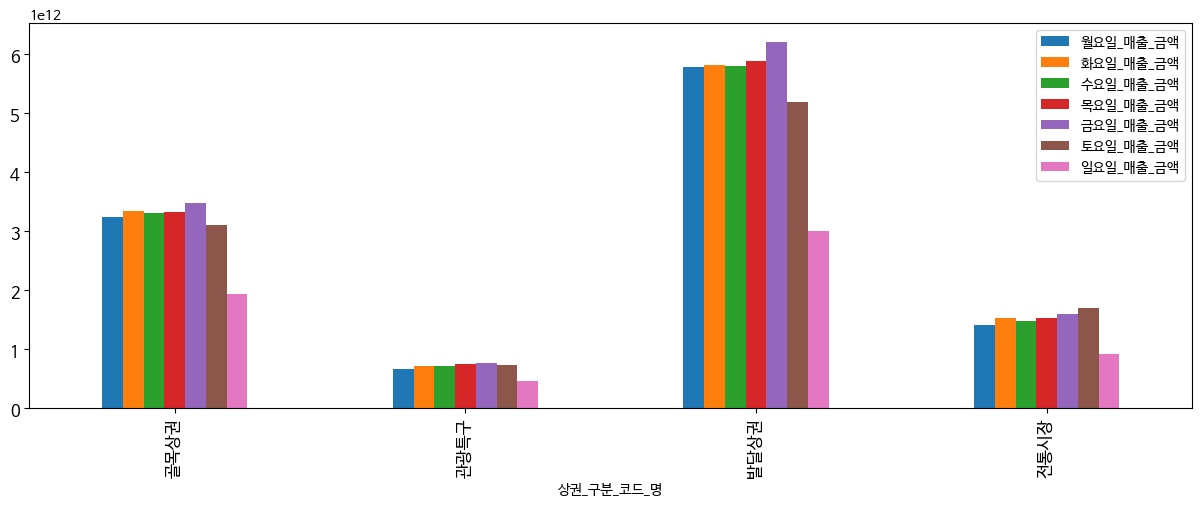

In [23]:
df_sales.groupby('상권_구분_코드_명')[['월요일_매출_금액', '화요일_매출_금액',
                                       '수요일_매출_금액', '목요일_매출_금액',
'금요일_매출_금액', '토요일_매출_금액',
'일요일_매출_금액']].sum()\
                                       .plot.bar(figsize=(15, 5), fontsize=12);

### 서비스 업종별 분석 및 시각화

In [24]:
df_sales.groupby('서비스_업종_코드_명')['점포수'].count()

서비스_업종_코드_명
PC방        1625
가구          782
가방          457
가전제품        529
가전제품수리      500
           ... 
한의원        3027
핸드폰        1117
호프-간이주점    4557
화장품        3190
화초         1991
Name: 점포수, Length: 63, dtype: int64

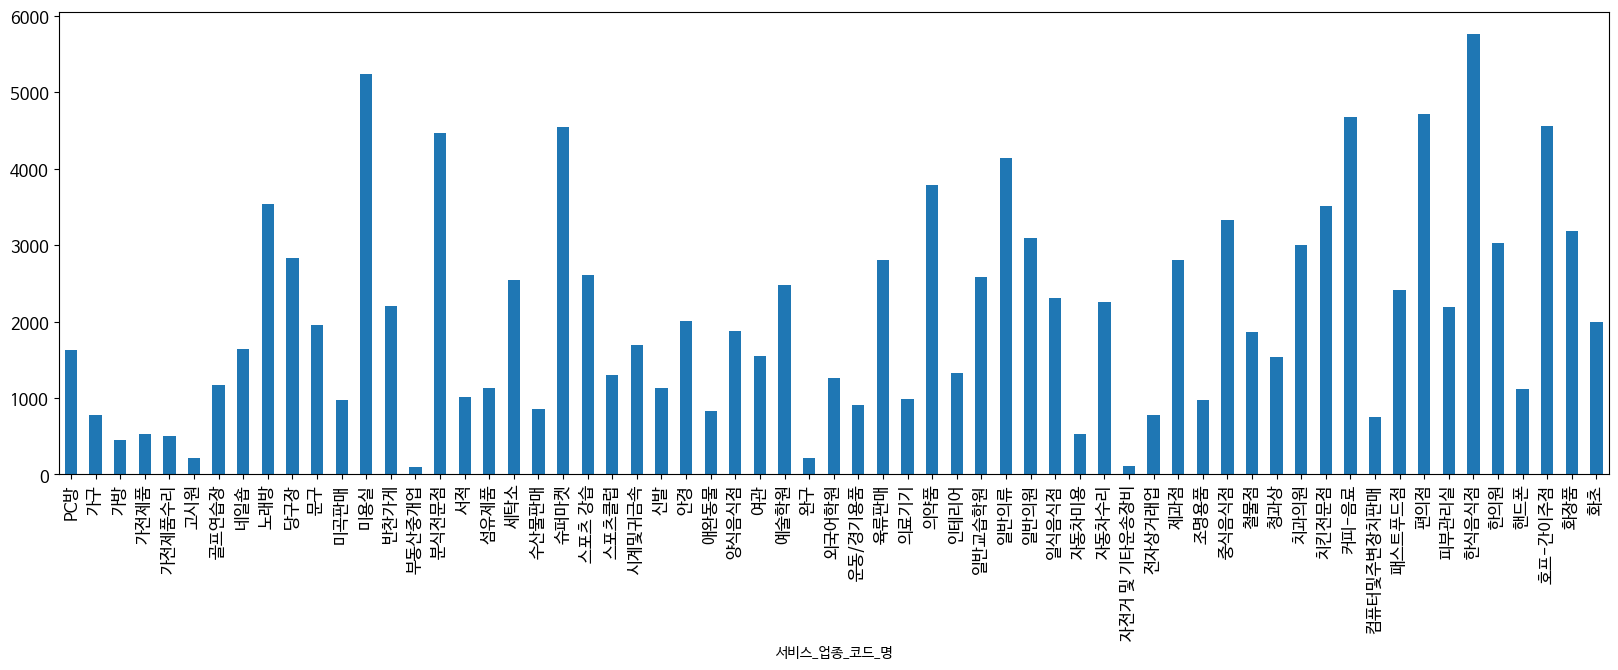

In [25]:
df_sales.groupby('서비스_업종_코드_명')['점포수'].count().plot.bar(figsize=(20, 6),
                                                                   fontsize=12);

In [26]:
df_sales.groupby('서비스_업종_코드_명').sum()

<ipython-input-26-972dd39c19a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby('서비스_업종_코드_명').sum()


,분기당_매출_금액,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,
PC방,3.644492e+11,2.394478e+11,1.250015e+11,46627480387,4.596808e+10,46709864604,47400124924,52742239079,63862261172,61139199374,3.036059e+11,6.064766e+10,25262318387,234237574739,64280616266,2.054200e+10,16442957206,3488111049,4059
가구,7.677649e+11,4.893078e+11,2.784571e+11,93664710815,1.017435e+11,98353684847,100284962349,95260962437,153394395835,125062692763,3.561845e+11,3.578979e+11,136616789,30743908326,125033642364,1.920406e+11,210827176069,155302823701,4316
가방,2.041616e+11,1.407317e+11,6.342984e+10,22778738882,2.779059e+10,31565620530,29625913057,28970852820,34370246531,29059589062,7.286100e+10,1.199658e+11,1256486379,39367492529,44095111580,4.128572e+10,35655822635,31166150590,6232
가전제품,1.213880e+12,7.693434e+11,4.445377e+11,176379114767,1.495280e+11,144596080479,140451399409,158388155299,224778636089,219759043107,6.342917e+11,5.356028e+11,737807795,71029125473,233844786768,3.203570e+11,308533553848,235400969962,5165
가전제품수리,4.044614e+10,3.556642e+10,4.879716e+09,7395748517,7.260948e+09,6651666736,6502434772,7755623390,4238332454,641383865,1.979733e+10,1.534983e+10,60200255,2812987430,7378363871,8.399152e+09,8375762475,8120624859,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한의원,6.892942e+11,5.579741e+11,1.313201e+11,129827213355,1.153604e+11,102688409757,97699879232,112398173286,122372563688,8947572914,2.742097e+11,4.090628e+11,721552239,55160607137,116106865481,1.667016e+11,171423470023,173157934778,9240
핸드폰,2.922778e+11,2.256663e+11,6.661152e+10,47980727531,3.879079e+10,46828653286,45340131817,46725981128,44397832225,22213689613,1.368380e+11,1.088474e+11,4088292038,42493855273,52937461439,6.398548e+10,53627500503,28549595886,7365
호프-간이주점,1.718303e+12,1.203239e+12,5.150640e+11,199697948736,2.252858e+11,240127950720,248060802896,290066622199,307528927742,207535095522,1.031424e+12,5.335698e+11,21858096816,557481436341,394400640351,2.728791e+11,224376185549,93998233211,42705


<ipython-input-27-62fcaeffbb43>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales.groupby('서비스_업종_코드_명').sum().plot.barh(figsize=(10, 24),


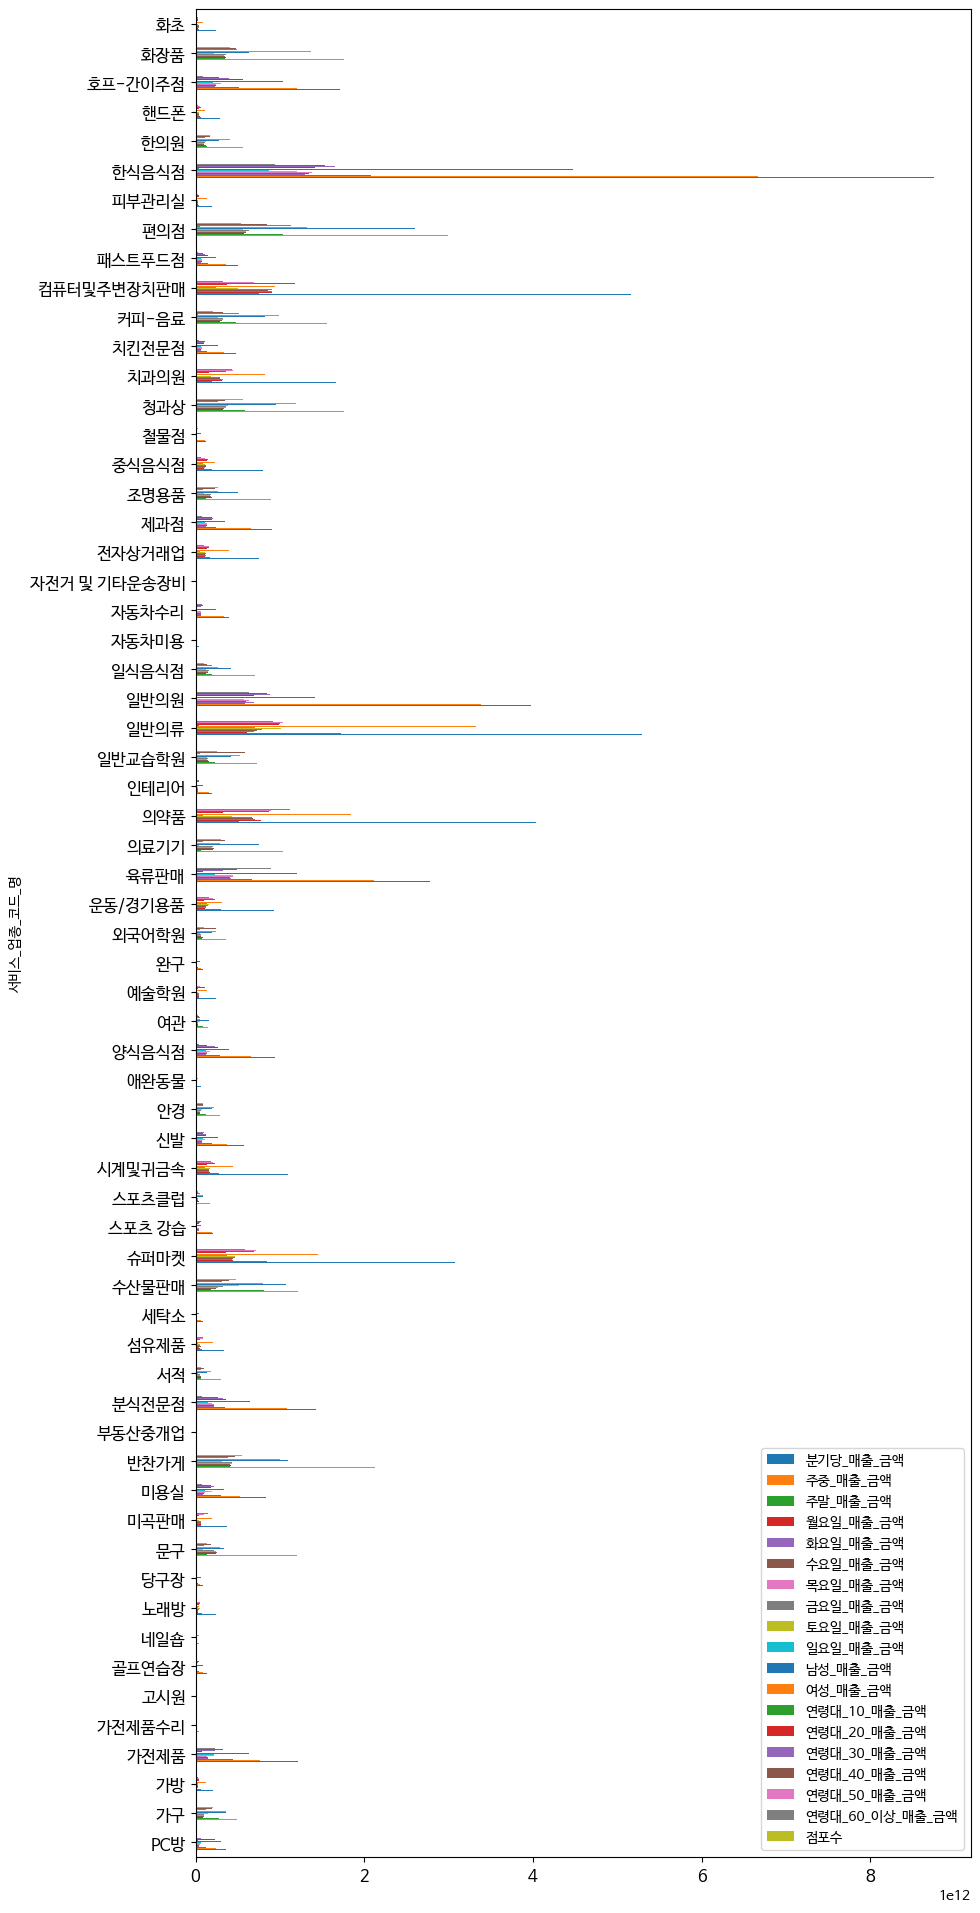

In [27]:
df_sales.groupby('서비스_업종_코드_명').sum().plot.barh(figsize=(10, 24),
                                                        fontsize=12);

In [28]:
df_sales.groupby('서비스_업종_코드_명')['분기당_매출_금액'].sum()

서비스_업종_코드_명
PC방        3.644492e+11
가구         7.677649e+11
가방         2.041616e+11
가전제품       1.213880e+12
가전제품수리     4.044614e+10
               ...     
한의원        6.892942e+11
핸드폰        2.922778e+11
호프-간이주점    1.718303e+12
화장품        2.116488e+12
화초         2.370799e+11
Name: 분기당_매출_금액, Length: 63, dtype: float64

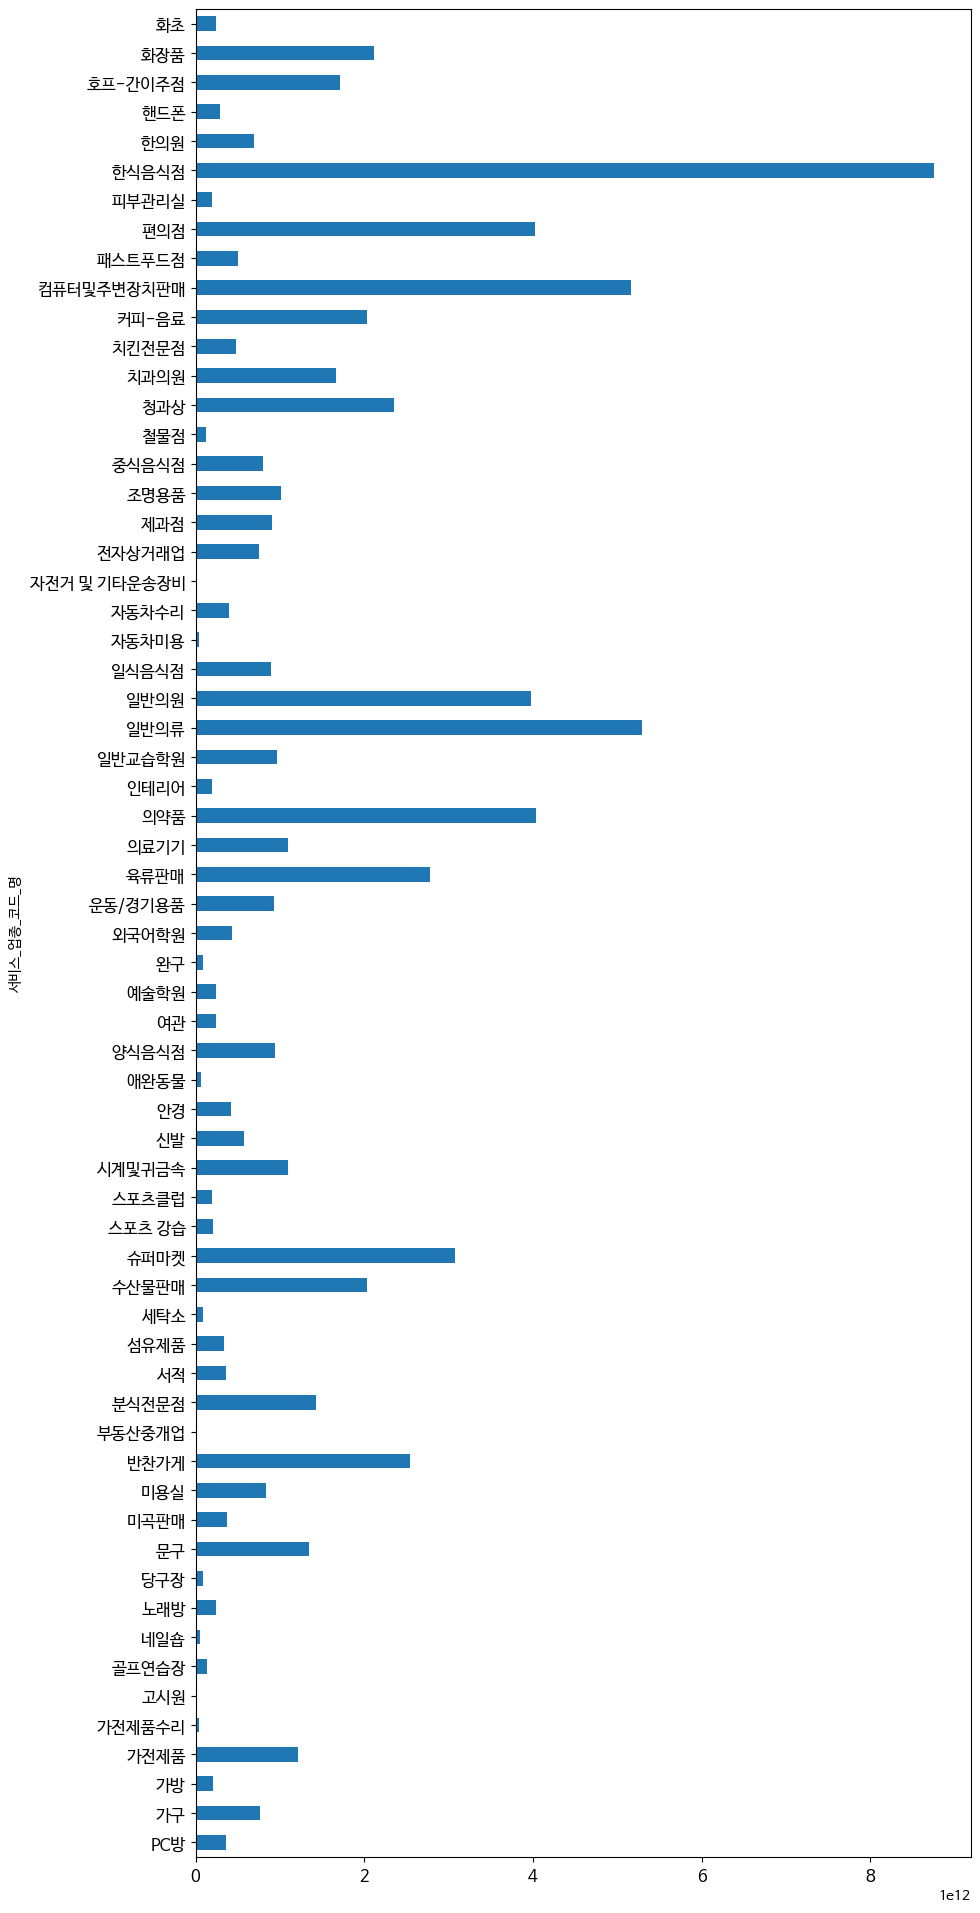

In [29]:
df_sales.groupby('서비스_업종_코드_명')['분기당_매출_금액'].sum()\
.plot.barh(figsize=(10, 24), fontsize=12);

In [30]:
df_sales.groupby('서비스_업종_코드_명')[['주중_매출_금액', '주말_매출_금액']].sum()

,주중_매출_금액,주말_매출_금액
서비스_업종_코드_명,,
PC방,2.394478e+11,1.250015e+11
가구,4.893078e+11,2.784571e+11
가방,1.407317e+11,6.342984e+10
가전제품,7.693434e+11,4.445377e+11
가전제품수리,3.556642e+10,4.879716e+09
...,...,...
한의원,5.579741e+11,1.313201e+11
핸드폰,2.256663e+11,6.661152e+10
호프-간이주점,1.203239e+12,5.150640e+11


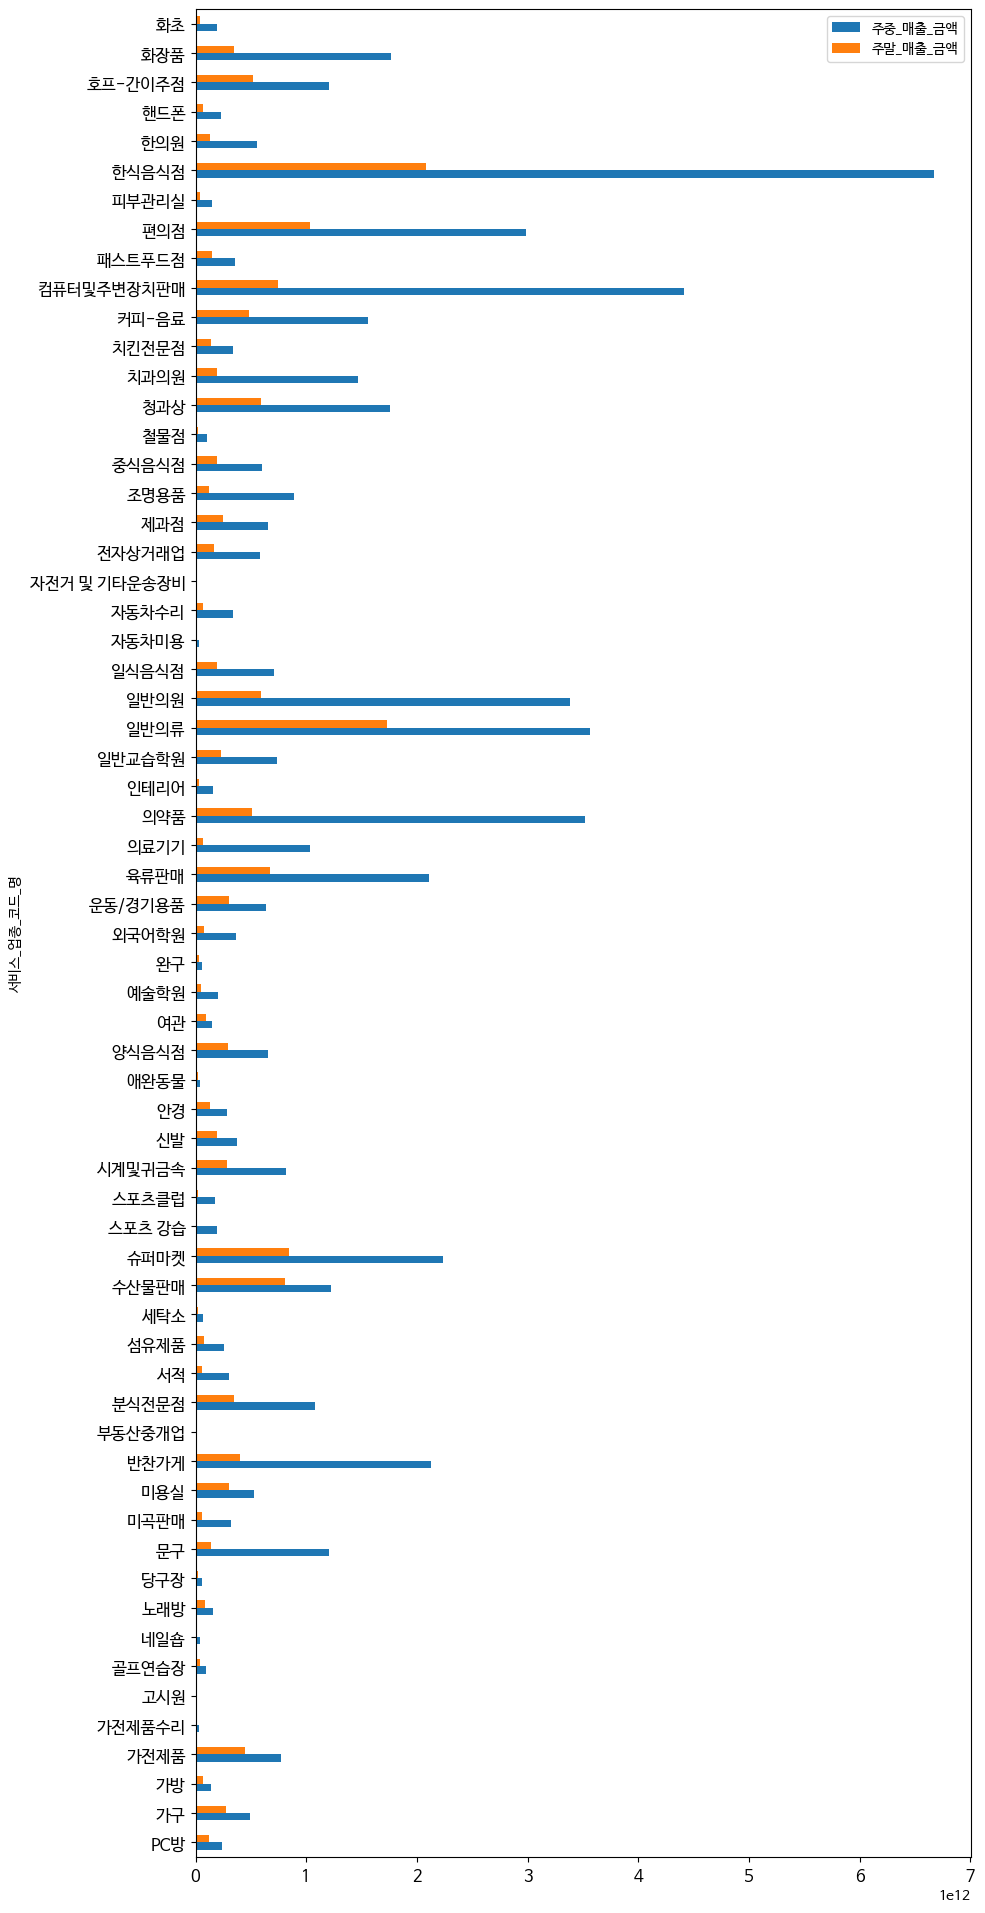

In [31]:
df_sales.groupby('서비스_업종_코드_명')[['주중_매출_금액',
                                         '주말_매출_금액']].sum()\
                                         .plot.barh(figsize=(10, 24), fontsize=12);

In [32]:
df_sales.groupby('서비스_업종_코드_명')[['연령대_10_매출_금액', '연령대_20_매출_금액',
                                         '연령대_30_매출_금액', '연령대_40_매출_금액',
'연령대_50_매출_금액', '연령대_60_이상_매출_금액']].sum()

,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
서비스_업종_코드_명,,,,,,
PC방,25262318387,234237574739,64280616266,2.054200e+10,16442957206,3488111049
가구,136616789,30743908326,125033642364,1.920406e+11,210827176069,155302823701
가방,1256486379,39367492529,44095111580,4.128572e+10,35655822635,31166150590
가전제품,737807795,71029125473,233844786768,3.203570e+11,308533553848,235400969962
가전제품수리,60200255,2812987430,7378363871,8.399152e+09,8375762475,8120624859
...,...,...,...,...,...,...
한의원,721552239,55160607137,116106865481,1.667016e+11,171423470023,173157934778
핸드폰,4088292038,42493855273,52937461439,6.398548e+10,53627500503,28549595886
호프-간이주점,21858096816,557481436341,394400640351,2.728791e+11,224376185549,93998233211


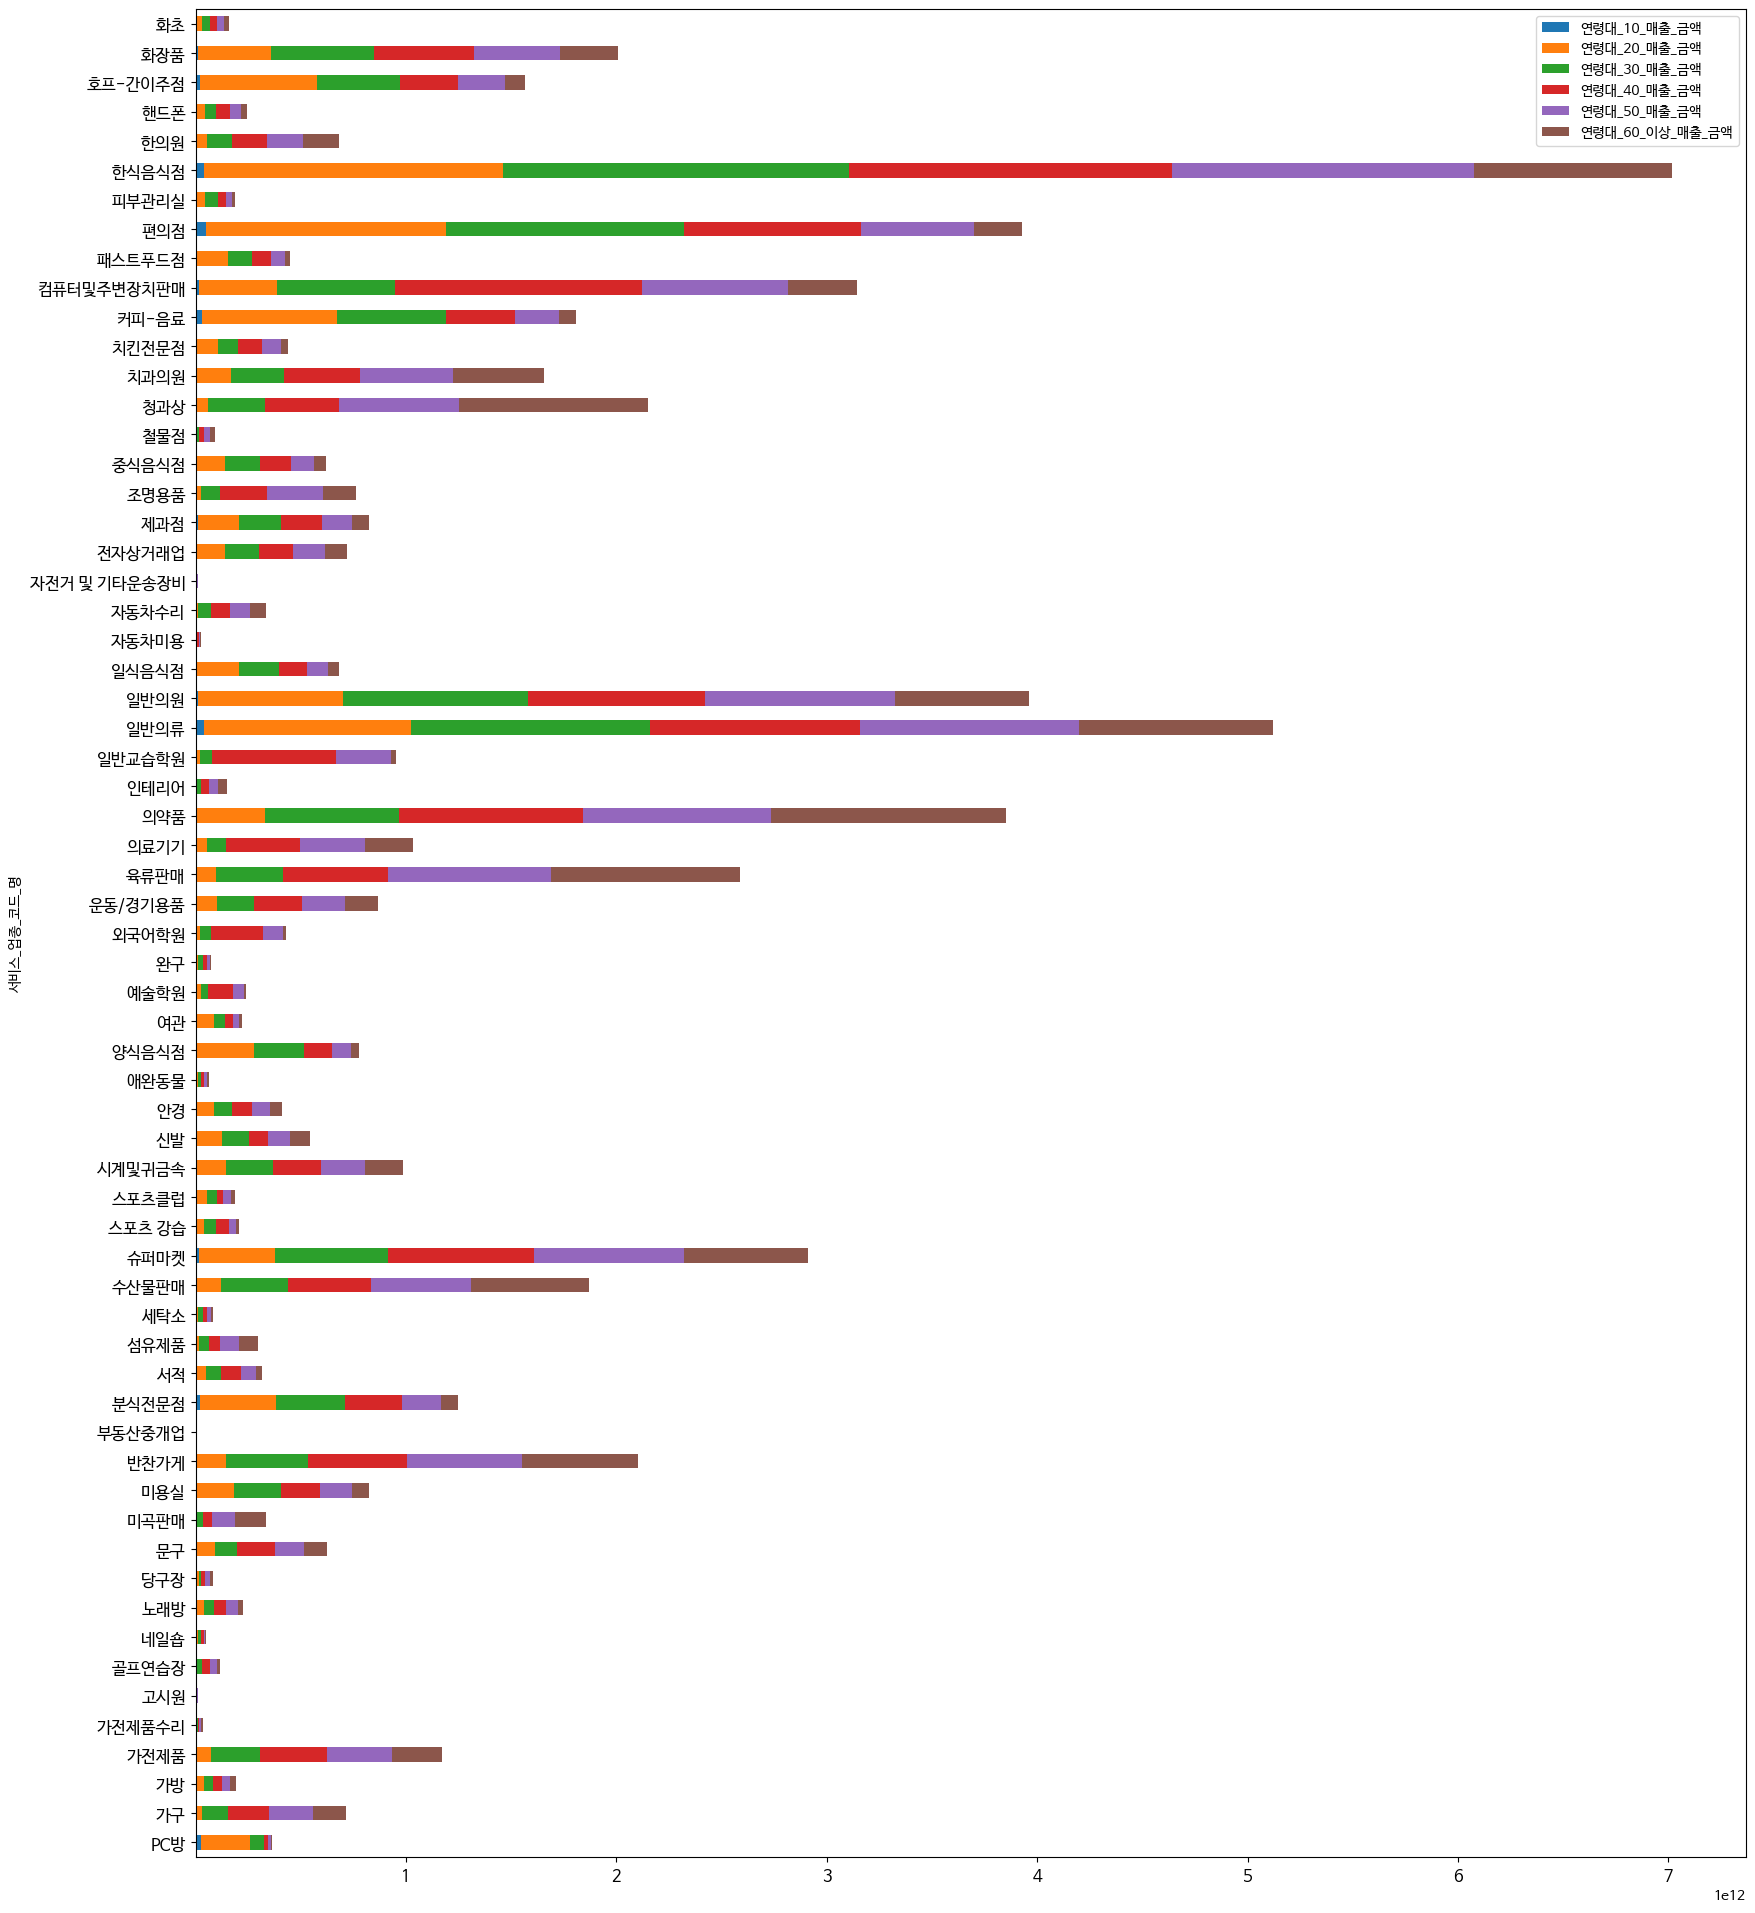

In [33]:
df_sales.groupby('서비스_업종_코드_명')[['연령대_10_매출_금액', '연령대_20_매출_금액',
                                         '연령대_30_매출_금액', '연령대_40_매출_금액',
                                 '연령대_50_매출_금액', '연령대_60_이상_매출_금액']].sum()\
                                         .plot.barh(stacked=True, figsize=(20, 24), fontsize=12);

In [34]:
df_sales.groupby('서비스_업종_코드_명')[['남성_매출_금액', '여성_매출_금액']].sum()

,남성_매출_금액,여성_매출_금액
서비스_업종_코드_명,,
PC방,3.036059e+11,6.064766e+10
가구,3.561845e+11,3.578979e+11
가방,7.286100e+10,1.199658e+11
가전제품,6.342917e+11,5.356028e+11
가전제품수리,1.979733e+10,1.534983e+10
...,...,...
한의원,2.742097e+11,4.090628e+11
핸드폰,1.368380e+11,1.088474e+11
호프-간이주점,1.031424e+12,5.335698e+11


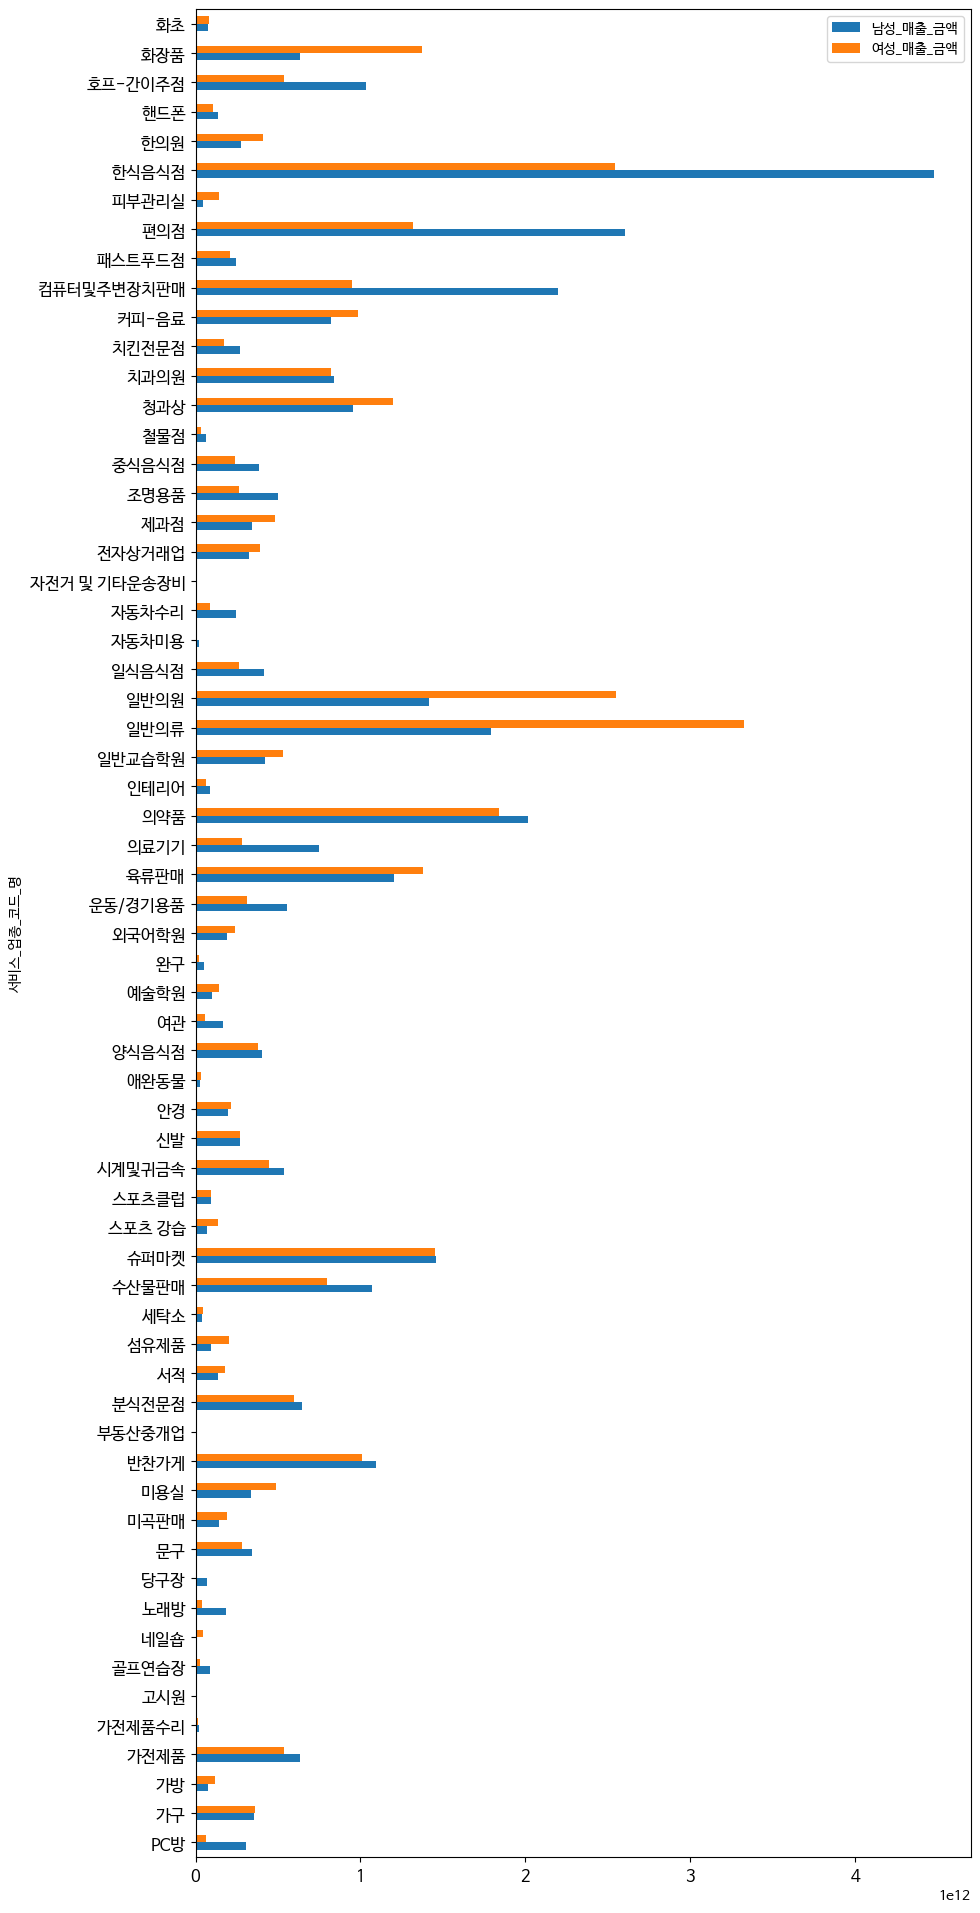

In [35]:
df_sales.groupby('서비스_업종_코드_명')[['남성_매출_금액',
                                         '여성_매출_금액']].sum()\
                                         .plot.barh(figsize=(10, 24), fontsize=12);

In [36]:
df_sales.groupby('서비스_업종_코드_명')[['월요일_매출_금액', '화요일_매출_금액',
                                         '수요일_매출_금액', '목요일_매출_금액',
'금요일_매출_금액', '토요일_매출_금액',
'일요일_매출_금액']].sum()

,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액
서비스_업종_코드_명,,,,,,,
PC방,46627480387,4.596808e+10,46709864604,47400124924,52742239079,63862261172,61139199374
가구,93664710815,1.017435e+11,98353684847,100284962349,95260962437,153394395835,125062692763
가방,22778738882,2.779059e+10,31565620530,29625913057,28970852820,34370246531,29059589062
가전제품,176379114767,1.495280e+11,144596080479,140451399409,158388155299,224778636089,219759043107
가전제품수리,7395748517,7.260948e+09,6651666736,6502434772,7755623390,4238332454,641383865
...,...,...,...,...,...,...,...
한의원,129827213355,1.153604e+11,102688409757,97699879232,112398173286,122372563688,8947572914
핸드폰,47980727531,3.879079e+10,46828653286,45340131817,46725981128,44397832225,22213689613
호프-간이주점,199697948736,2.252858e+11,240127950720,248060802896,290066622199,307528927742,207535095522
